In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from scipy import signal
from scipy.signal import find_peaks

In [2]:
# サンプリング周波数
sampling_rate = 100

# グラフの範囲
fig_range = (0, 5)

# グラフの設定
fontsize_title = 25
fontsize_label = 20

# 平滑化の設定
window = 20

fs = 400

In [3]:
# CSVファイルを読み込む
csv_file_path = "data_walk.csv"
raw_data = pd.read_csv(csv_file_path)

# normを計算
raw_data['norm'] = (raw_data['x']**2 + raw_data['y']**2 + raw_data['z']**2)**0.5

In [4]:
# 平滑化する関数
def smooth(x):
    dx = np.array([0]*window)
    for i in range(len(x[window:])):
        avg = sum(x[i - int(window/2): i+1 + int(window/2)]) / window
        dx = np.append(dx, avg)

    return dx

[ 471  562  651  704  761  825  875 1148 1202 1294 1438 1492]


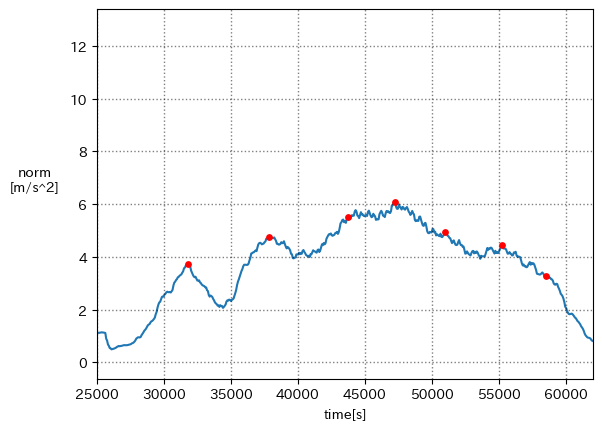

In [5]:
# window=10 の移動平均を計算 ローパスフィルター
low_norm = raw_data['norm'].rolling(window=40).mean()

# 　折線グラフを描画
plt.plot(raw_data['time'], low_norm, zorder=1)
plt.xlabel('time[s]')
plt.ylabel('norm\n[m/s^2]', rotation=0, labelpad=25)
plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
plt.xlim(0, 8)

# ピークを検出
peek, _ = signal.find_peaks(low_norm, distance=50, height=1.5)
print(peek)
# 赤点を描画
plt.scatter(raw_data['time'][peek], low_norm[peek], s=15, color='red', zorder=2)
plt.xlim(25000,62000)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (1893,) and (1913,)

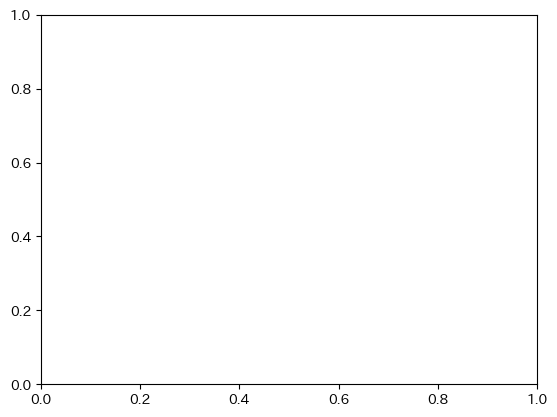

In [6]:
low_norm = smooth(raw_data['norm'])

# 　折線グラフを描画
plt.plot(raw_data['time'][:-20], low_norm, zorder=1)
plt.xlabel('time[s]')
plt.ylabel('norm\n[m/s^2]', rotation=0, labelpad=25)
plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
plt.xlim(0, 8)

# ピークを検出
peek, _ = signal.find_peaks(low_norm, distance=50, height=1.5)
print(peek)
# 赤点を描画
plt.scatter(raw_data['time'][peek], low_norm[peek], s=15, color='red', zorder=2)
plt.xlim(25000,62000)
plt.show()

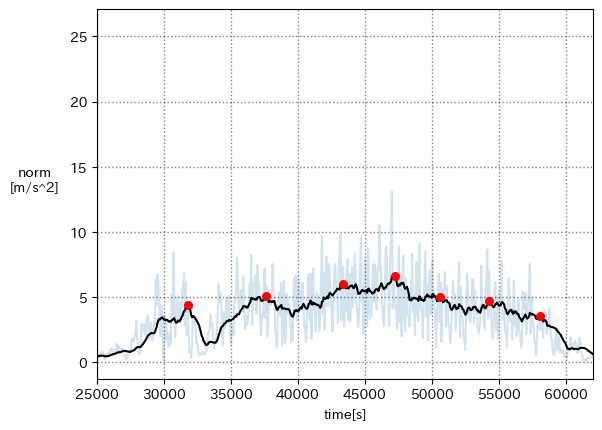

In [ ]:
# window=10 の移動平均を計算 ローパスフィルター
low_norm_1 = smooth(raw_data['norm'])
low_norm_2 = raw_data['norm'].rolling(window=20).mean()

# 　折線グラフを描画
plt.plot(raw_data['time'], raw_data['norm'], zorder=1, label="norm", alpha=0.2)
# plt.plot(raw_data['time'][10:-10], low_norm_1, zorder=1, label="自作関数")
plt.plot(raw_data['time'], low_norm_2, zorder=1, label="pandas.rolling()", color='black')
plt.xlabel('time[s]')
plt.ylabel('norm\n[m/s^2]', rotation=0, labelpad=25)
plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
plt.xlim(0, 7)

# ピークを検出
peek, _ = signal.find_peaks(low_norm_2, distance=50, height=1.5)
# 赤点を描画
# plt.scatter(raw_data['time'][peek], low_norm_1[peek], s=15, color='red', zorder=2)
plt.scatter(raw_data['time'][peek], low_norm_2[peek], s=30, color='red', zorder=2)
plt.xlim(25000,62000)
# plt.legend()
plt.show()


In [8]:
# 時間、X軸、Y軸、Z軸のデータを取得
start_time = raw_data['time'][0]
relative_time = raw_data['time'] - start_time - 0.4
raw_data['v_norm'] = np.cumsum(raw_data['norm']) / fs
raw_data['smooth'] = raw_data['v_norm'].rolling(window=10).mean()
raw_data['v_norm_integral'] = np.cumsum(raw_data['v_norm']) / fs
raw_data['smooth_integral'] = raw_data['v_norm_integral'].rolling(window=10).mean()
raw_data['smooth_norm'] = raw_data['norm'].rolling(window=10).mean()


1913


/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_70355/2809102290.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=1)


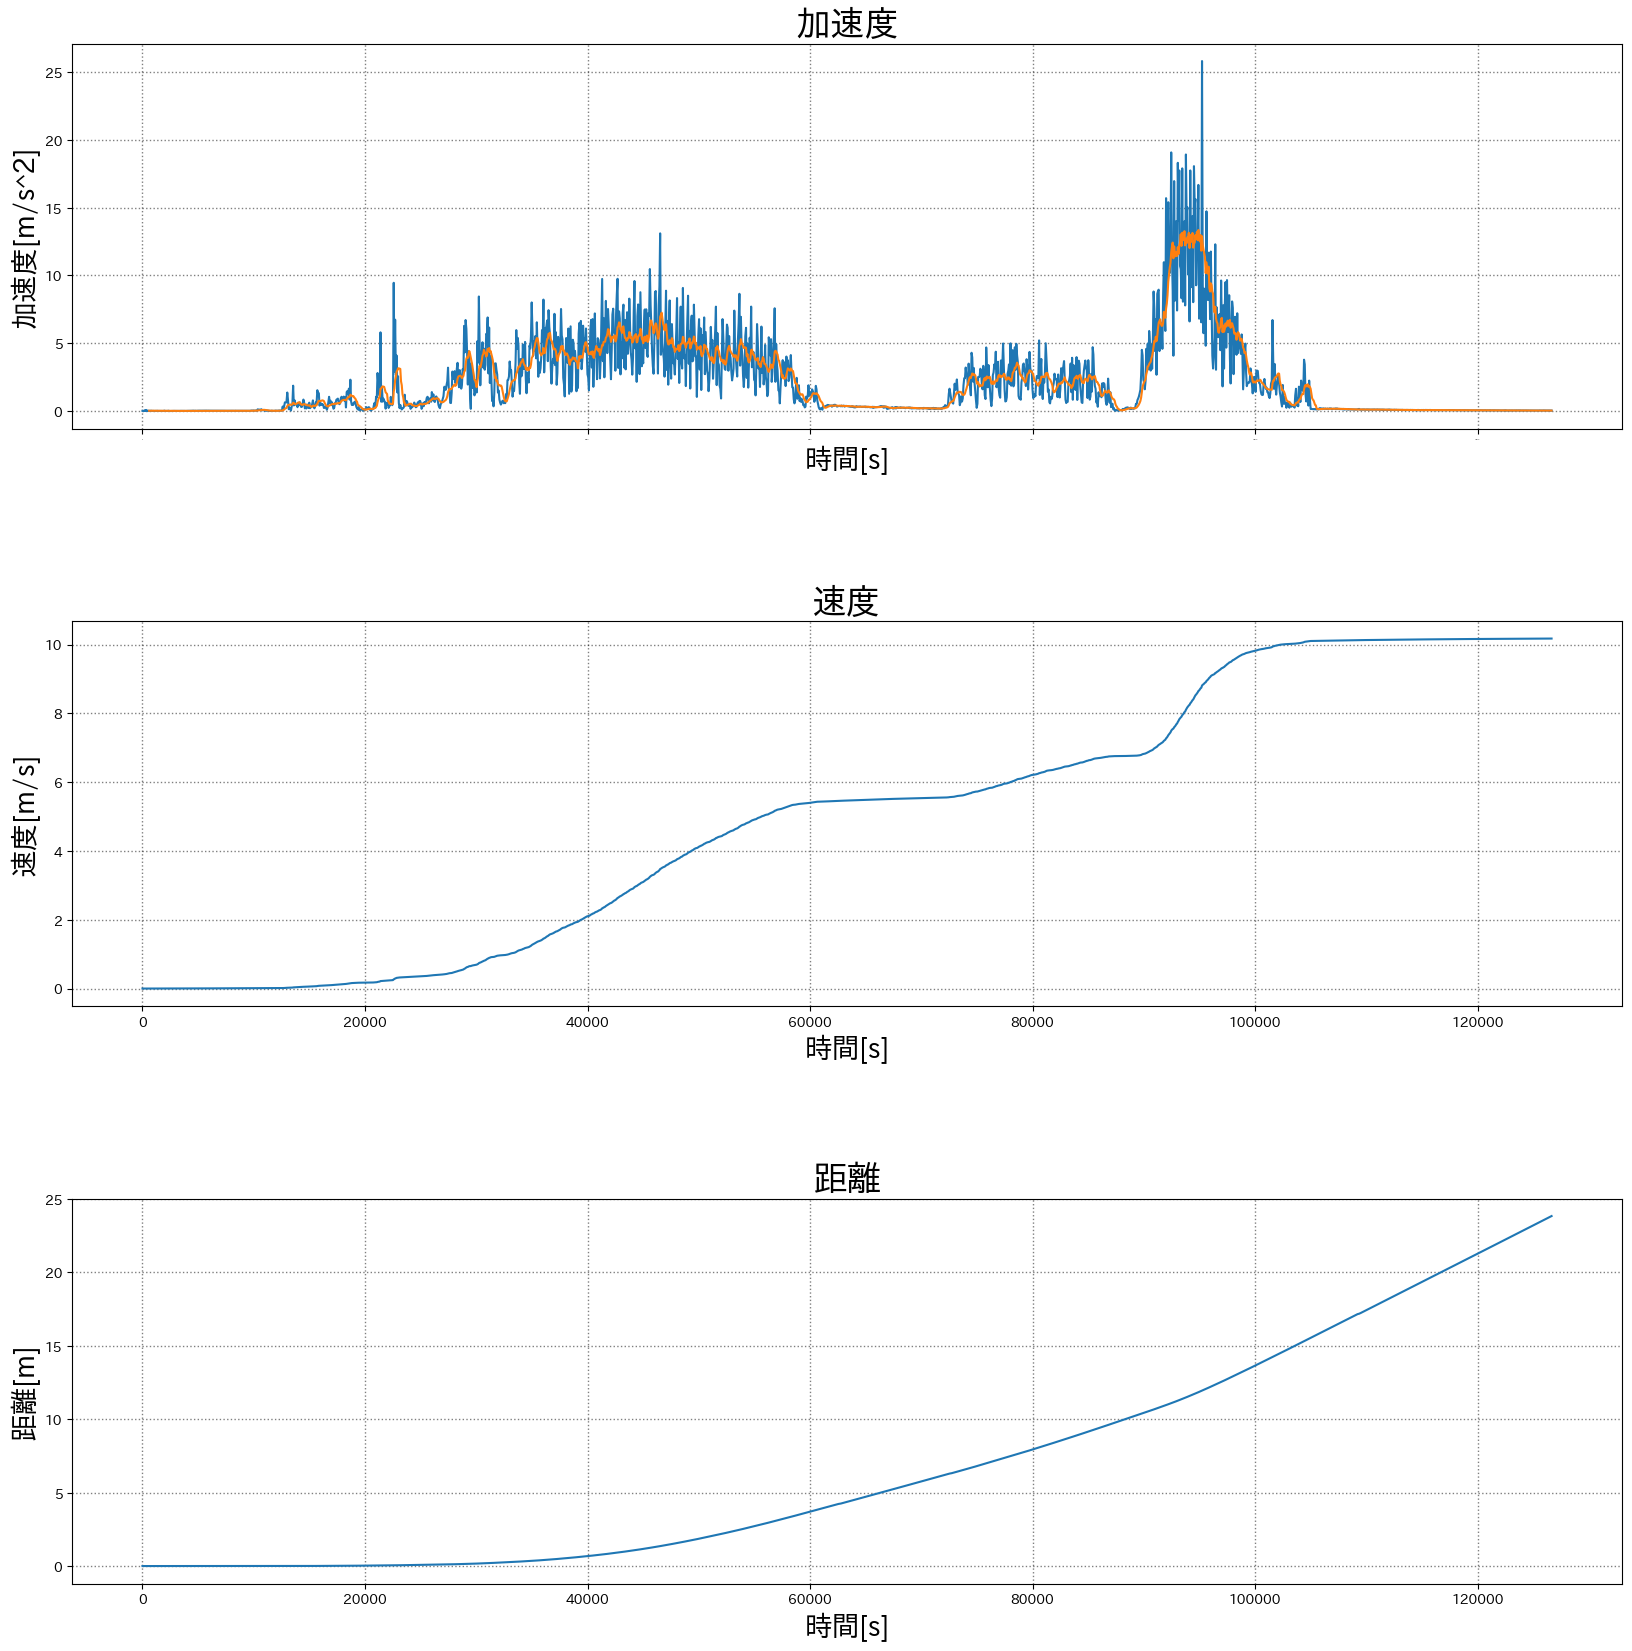

In [10]:
# グラフの描画
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(3, 1, 1)
plt.subplots_adjust(hspace=0.5)
ax1.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax1.set_title('加速度', fontdict={'size': fontsize_title})
ax1.set_xlabel('時間[s]', fontdict={'size': fontsize_label})
ax1.set_ylabel('加速度[m/s^2]', fontdict={'size': fontsize_label})
# ax1.set_ylim(0,0.0)

ax2 = fig.add_subplot(3, 1, 2)
ax2.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax2.set_title('速度', fontdict={'size': fontsize_title})
ax2.set_xlabel('時間[s]', fontdict={'size': fontsize_label})
ax2.set_ylabel('速度[m/s]', fontdict={'size': fontsize_label})

ax3 = fig.add_subplot(3, 1, 3)
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax3.set_title('距離', fontdict={'size': fontsize_title})
ax3.set_xlabel('時間[s]', fontdict={'size': fontsize_label})
ax3.set_ylabel('距離[m]', fontdict={'size': fontsize_label})

# データをプロット
ax1.plot(relative_time, raw_data['norm'], label="a")
ax1.plot(relative_time, raw_data['smooth_norm'], label="a'")
ax2.plot(relative_time, raw_data['v_norm'], label="v")
# ax2.plot(relative_time, raw_data['smooth'], label="v'")
ax3.plot(relative_time, raw_data['v_norm_integral'], label="p")
# ax3.plot(relative_time, raw_data['smooth_integral'], label="p'")

# 範囲を指定
# ax1.set_xlim(*fig_range)
# ax2.set_xlim(*fig_range)
# ax3.set_xlim(*fig_range)

# メモリの設定
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=1)
# グラフを表示
plt.show()